<a href="https://colab.research.google.com/github/vifirsanova/nlp-course/blob/main/tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практикум: строим векторную модель для контент-анализа Telegram

#### Шаг 1: выгрузка данных из Telegram-канала

- извлекаем тексты из Telegram-канала
- используем код из занятия 1, чтобы извлечь все тексты
- сохраняем тексты в формате `txt`, например, `data.txt`

Эти тексты понадобятся нам, поэтому сохраним `data.txt` у себя на компьютере.

Подсказка: используйте метод `writelines` для записи строк в один файл

```
f.writelines(["cat\n", "dog\n"])
```

In [ ]:
### Ваш код здесь ###

#### Шаг 2: откройте файл и запишите текст в переменную

Запишите весь текст в одну переменную, т.к. мы будем использовать необычный способ деления текста на документы.

In [ ]:
### Ваш код здесь: откройте файл и запишите его в перменную ###

Разделим текст на **чанки** - небольшие отрывки удобные для обработки.

**Вопрос:** зачем делить текст на чанки?

Мы будем использовать готовый инструмент "рекурсивный сплитер". Этот инструмент создан на основе статистических алгоритмов и построен так, чтобы делить весь текст с учетом особенностей *синтаксиса*. В его основе - рекурсивный алгоритм, который вычисляет повторяющиеся (рекурсивные) паттерны, т.е. закономерности, в тексте.

In [ ]:
# Импортируем сплитер из библиотеки langchain
# Langchain - это набор инструментов для построения диалоговых систем с LLM
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Инициализируем сплитер
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,   # Задаем размер чанка, например, 1000 символов
    chunk_overlap=100  # Задаем пересечение между чанками, равное 100 символам
)

# Производим деление на чанки
chunks = text_splitter.split_text(data)

# Выводим на экран чанки
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:\n{chunk}\n")

Chunk 1:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for r

Выведите на экран несколько чанков и их длину.

**Вопрос:** Действительно ли длина одного чанка составляет 1000 символов? Соблюдается ли в делении на чанки синтаксическое единство?

In [ ]:
### Ваш код здесь: выведите 2-3 чанка, и их длину ###

#### Шаг 3: токенизация

Проведем чистку текста.

1. Напишем функцию для чистки текста, которая
  - приводит текст к нижнему регистру
  - удаляет все символы кроме букв
  - удаляет двойные пробелы

2. Применим функцию ко всем чанкам

In [ ]:
import re

# Допишите функцию
def clean_text(text):
    # 1. Приводим текст к нижнему регистру
    ### Ваш код здесь ###

    # 2. Удаляем все символы кроме букв: используем re.sub и регулярку [^a-z\s]
    ### Ваш код здесь ###

    # 3. Удаляем двойные пробелы. Замените ### на подходящее регулярное выражение
    text = re.sub(r'###', ' ', text).strip()

    return text

In [ ]:
### Ваш код здесь: напишите цикл for, который применяет функцию clean_text
### к каждому чанку и перезаписывает очищенный чанк в новый список

Выполните простую токенизацию по словам с помощью функции `split`. Примените `split` к каждому чанку из списка чанков и перезапишите результат в новый список.

In [ ]:
### Ваш код здесь ###

#### Шаг 4: строим модель Word2Vec

In [ ]:
!pip install gensim -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.3 MB/s eta 0:00:00


Мы применяем уже готовую "сборку" Word2Vec к нашим данным.

In [ ]:
from gensim.models import Word2Vec

# Обучение модели
model = Word2Vec(sentences=chunks, vector_size=100, window=5, min_count=1, workers=4)

# Сохранение модели
model.save("word2vec.model")

**Вопрос:** найдите документацию библиотеки gensim и опишите, за что отвечают следующие параметры

- sentences
- vector_size
- window
- min_count
- workers

In [ ]:
# Загрузка модели
model = Word2Vec.load("word2vec.model")

# Получение вектора для слова
vector = model.wv["romeo"]

# Нахождение похожих слов
similar_words = model.wv.most_similar("romeo", topn=3)
print(similar_words)

[('juliet', 0.9984756708145142), ('swear', 0.9978036880493164), ('katharina', 0.9975891709327698)]


Оценка сходства, векторной близости

In [ ]:
similarity = model.wv.similarity("romeo", "juliet")
print(similarity)

0.9984756


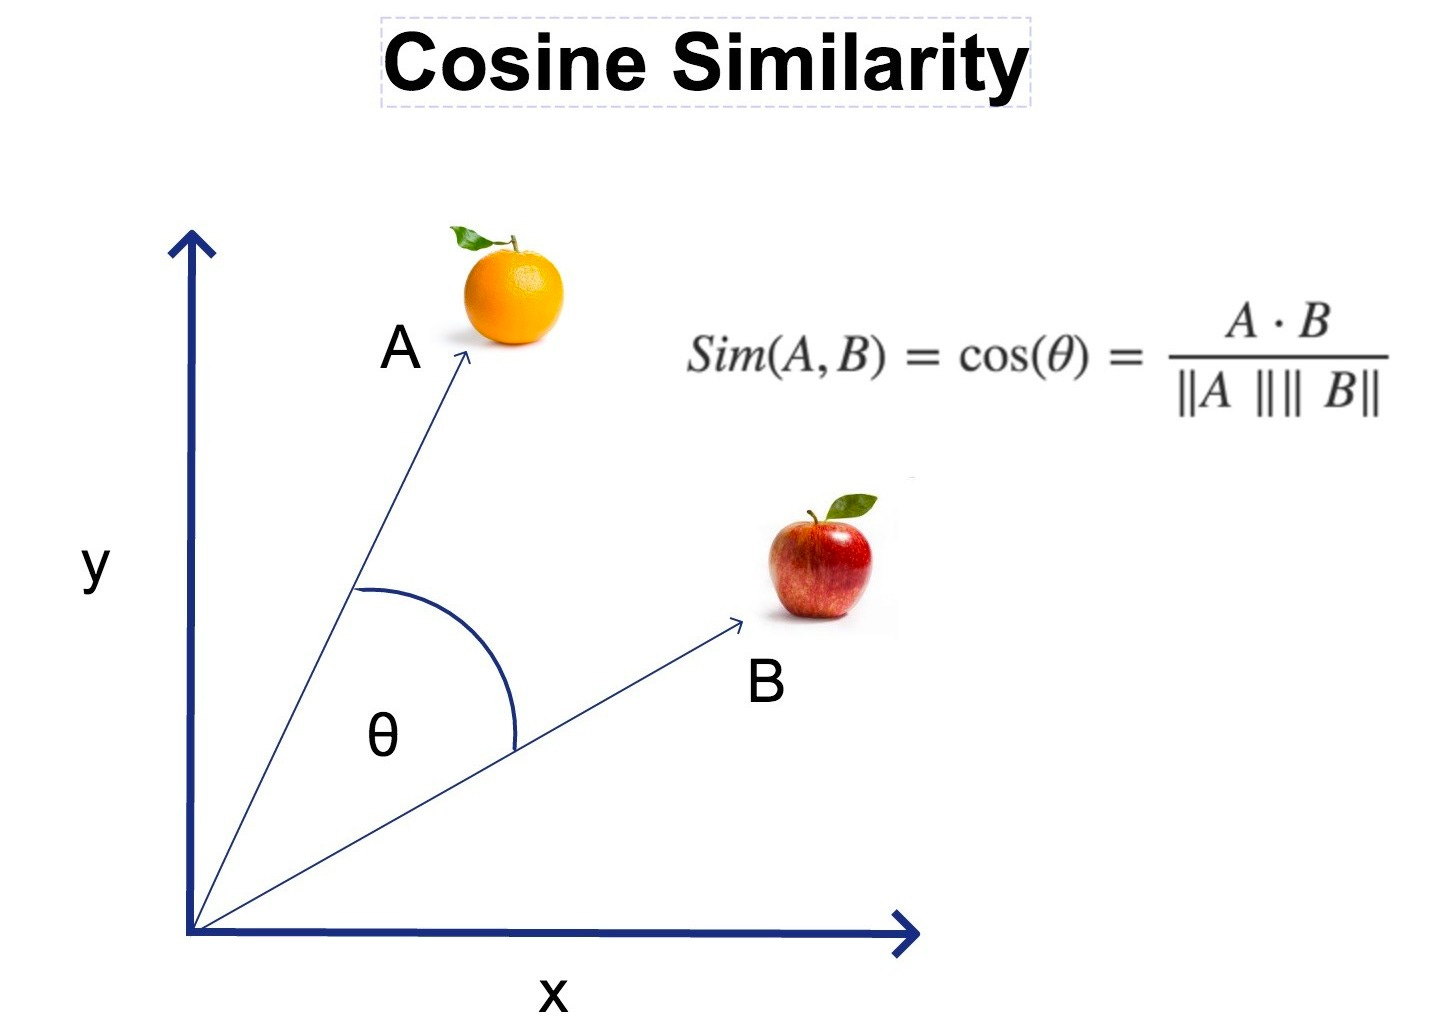

*Источник изображения: https://businessanalytics.substack.com/p/cosine-similarity-explained*

Как выглядит вектор?

In [ ]:
model.wv['juliet']

array([-0.30297157,  0.5651201 , -0.1362622 , -0.06882866,  0.21651064,
       -0.730604  ,  0.3758553 ,  0.85267574, -0.4420617 , -0.9920905 ,
       -0.5560107 , -0.8370288 , -0.22603056,  0.13165125,  0.34931228,
       -0.35808754, -0.19559132, -0.4567889 , -0.06976118, -0.6113457 ,
        0.57309514,  0.36912736,  0.13352907,  0.33533248, -0.16258939,
       -0.0648586 , -0.17332199, -0.2938453 , -0.36281416, -0.19104888,
        0.21223   , -0.11628557,  0.1337754 , -0.7447379 , -0.00828601,
        0.28434393, -0.08301867, -0.16776219, -0.04105577, -0.84199613,
        0.26300713, -0.29424787, -0.4819579 ,  0.16446841,  0.46121427,
       -0.29947975, -1.0917182 , -0.45645535,  0.57300675,  0.5013639 ,
        0.5717722 , -0.5328131 ,  0.10950032,  0.23034337,  0.06768379,
       -0.06261094,  0.26467717, -0.02599932, -0.6941203 ,  0.09462182,
        0.42091203,  0.44214112, -0.26389077, -0.14256303, -0.652654  ,
        0.45006007,  0.2283383 ,  0.6443758 , -0.95207065,  0.21

Где применяются "умные" вектора?

- **Информационный поиск**: хранить информацию индекса удобнее в векторах, чтобы найти релевантный ответ в Google Search, достаточно "вытащить" из каталога наиболее близкий по вектору результат

- **Виртуальные ассистенты**: чат-боты на основе ИИ также используют эту технологию, чтобы дополнять свои ответы информацией из векторной базы знаний

- **Машинное обучение**: векторные представления создают перед машинным обучением, чтобы повысить качество классификации или моделирования языка

#### Шаг 5: визуализация результатов

Визуализация многомерного изображения требует подготовки - **сокращения размерности** матрицы

Мы обучили модель с размерностью 100. Это значит, что каждый вектор нашей матрицы состоит из 100 чисел

Мы можем вывести отдельный вектор и посмотреть на эти числа, но мы не сможем нанести такой вектор на систему координат. Человеческий глаз может уловить двух- или трехмерное изображение, но большая размерность превратится для вас в "облако" из значений, которые невозможно разобрать

Как сократить размерность с 100 до 2х измерений?

**PCA (principal component analysis)** - это статистическая модель, которая поможет нам вычислить из 100 чисел 2 самых важных и привести всю информацию к виду двухмерной матрицы

- Как работает PCA: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

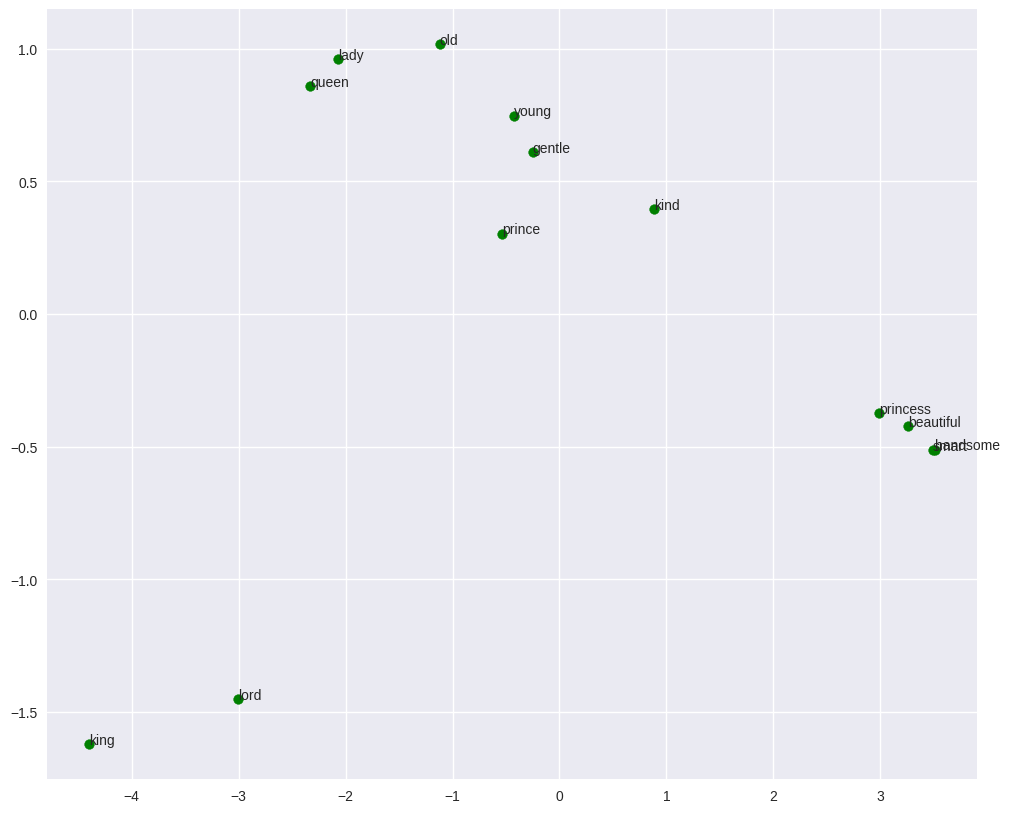

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# Модуль для построения PCA
from sklearn.decomposition import PCA

def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # Сокращаем размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # Отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # Задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')
  # Добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # Соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

# Картируем несколько слов
pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

### Домашнее задание

Попробуйте создать векторную базу знаний с помощью инструментов State-of-the-Art (наиболее производительных моделей на сегодняшний день)

1. Выберите любой текст в формате *.txt и нарежьте его на чанки с помощью инструмента из библиотеки Langchain, который мы использовали в этом занятии

In [ ]:
### Ваш код здесь ###

2. Создайте векторную базу данных с помощью SentenceTransformers, используя предоставленный код (он будет прогружаться около 5 минут)

In [ ]:
"""
Создаем векторную базу знаний с помощью модели SentenceTransformer
"""
# Загружаем Sentence Transformers
from sentence_transformers import SentenceTransformer
# Загружаем библиотеку numpy для работы с матрицами и векторами
import numpy as np

# Загружаем модель для создания векторных представлений
model = SentenceTransformer('all-MiniLM-L6-v2')

# Кодируем чанки с помощью готовой модели
vectors = model.encode(chunks)

3. Создайте индекс с помощью библиотеки `faiss`, используя данный код

In [ ]:
"""
Создаем индекс с помощью FAISS
"""
# Устанавливаем библиотеку FAISS
!pip install faiss-cpu
import faiss

# Вычисляем размерность вектора
dimension = vectors.shape[1]
# Создаем индекс, числовой "каталог" текстов
faiss_index = faiss.IndexFlatL2(dimension)
faiss_index.add(np.array(vectors))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 55.3 MB/s eta 0:00:00


4. Проведите семантический поиск

In [ ]:
query = "Who is Juliet?" # Введите сюда свой вопрос по текстам
top_k = 1 # Выбираем, какое количество результатов мы хотим вывести (здесь 1, т.е. мы выведем только самый релевантный результат, но это число можно увеличить, например, получить 5 верхних результатов)
vector = model.encode([query]) # Кодируем вектор

# Производим поиск
distances, indices = faiss_index.search(vector, top_k)

# Создаем каталог результатов
results = []
for i, idx in enumerate(indices[0]):
        results.append({
            "chunk": chunks[idx],
            "score": float(distances[0][i])
        })

# Выводим первый результат с ответом на вопрос
print("Top results for the query:")
print(f"Chunk: {results[0]['chunk']}\nScore: {results[0]['score']}\n")

Top results for the query:
Chunk: PRINCE:
This letter doth make good the friar's words,
Their course of love, the tidings of her death:
And here he writes that he did buy a poison
Of a poor 'pothecary, and therewithal
Came to this vault to die, and lie with Juliet.
Where be these enemies? Capulet! Montague!
See, what a scourge is laid upon your hate,
That heaven finds means to kill your joys with love.
And I for winking at your discords too
Have lost a brace of kinsmen: all are punish'd.

CAPULET:
O brother Montague, give me thy hand:
This is my daughter's jointure, for no more
Can I demand.

MONTAGUE:
But I can give thee more:
For I will raise her statue in pure gold;
That while Verona by that name is known,
There shall no figure at such rate be set
As that of true and faithful Juliet.

CAPULET:
As rich shall Romeo's by his lady's lie;
Poor sacrifices of our enmity!
Score: 0.7501823902130127



5. Ответьте на вопросы

 - кратко опишите проделанную работу
 - опишите результат поиска: релевантен ли найденный отрывок?
 - где можно использовать такую систему?

Полезные материалы:

- https://habr.com/ru/companies/okkamgroup/articles/509204/ - как работает FAISS
- https://huggingface.co/sentence-transformers - документация Sentence Transformers